In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
### Reading the csv file
df = pd.read_csv('assignment-1-data.csv')
df.shape

(2938, 22)

In [3]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
### Checking if there is any null values in our data
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [53]:
# Dropping the NaN Values that affects our Life expectancy 
df_0 = df.dropna(subset=['Schooling','Income composition of resources','Life expectancy ','Adult Mortality',' BMI ',' HIV/AIDS','GDP','Diphtheria ',' thinness  1-19 years'])
df_1 = df.dropna(subset=['under-five deaths ','Hepatitis B','Life expectancy ','Alcohol','infant deaths',' HIV/AIDS','GDP','Diphtheria ',' thinness 5-9 years'])
df_2 = df.dropna(subset=['Total expenditure',' BMI ','Life expectancy ','Alcohol','Measles ','percentage expenditure','GDP','Population','Country'])
df_3 = df.dropna(subset=['Adult Mortality',' BMI ','Life expectancy ',' HIV/AIDS','Schooling','Status','Income composition of resources','Year','Country'])
df_4 = df.dropna(subset=['Population','Total expenditure','Life expectancy ',' HIV/AIDS','Hepatitis B','infant deaths','Measles ','Year','GDP'])

In [37]:
# Check
print(df_0.shape)
print(df_1.shape)
print(df_2.shape)
print(df_3.shape)
print(df_4.shape)

(2450, 22)
(1857, 22)
(2101, 22)
(2736, 22)
(1667, 22)


In [7]:
# Check
print(df_0.isnull().sum())
print()
print(df_1.isnull().sum())
print()
print(df_2.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            146
percentage expenditure               0
Hepatitis B                        456
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                0
Total expenditure                  149
Diphtheria                           0
 HIV/AIDS                            0
GDP                                  0
Population                         220
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources      0
Schooling                            0
dtype: int64

Country                              0
Year                                 0
Status                               0
Life expect

In [8]:
# Deciding which features affects the value of life expentancy
cm = df.corr(method='pearson')

<AxesSubplot:>

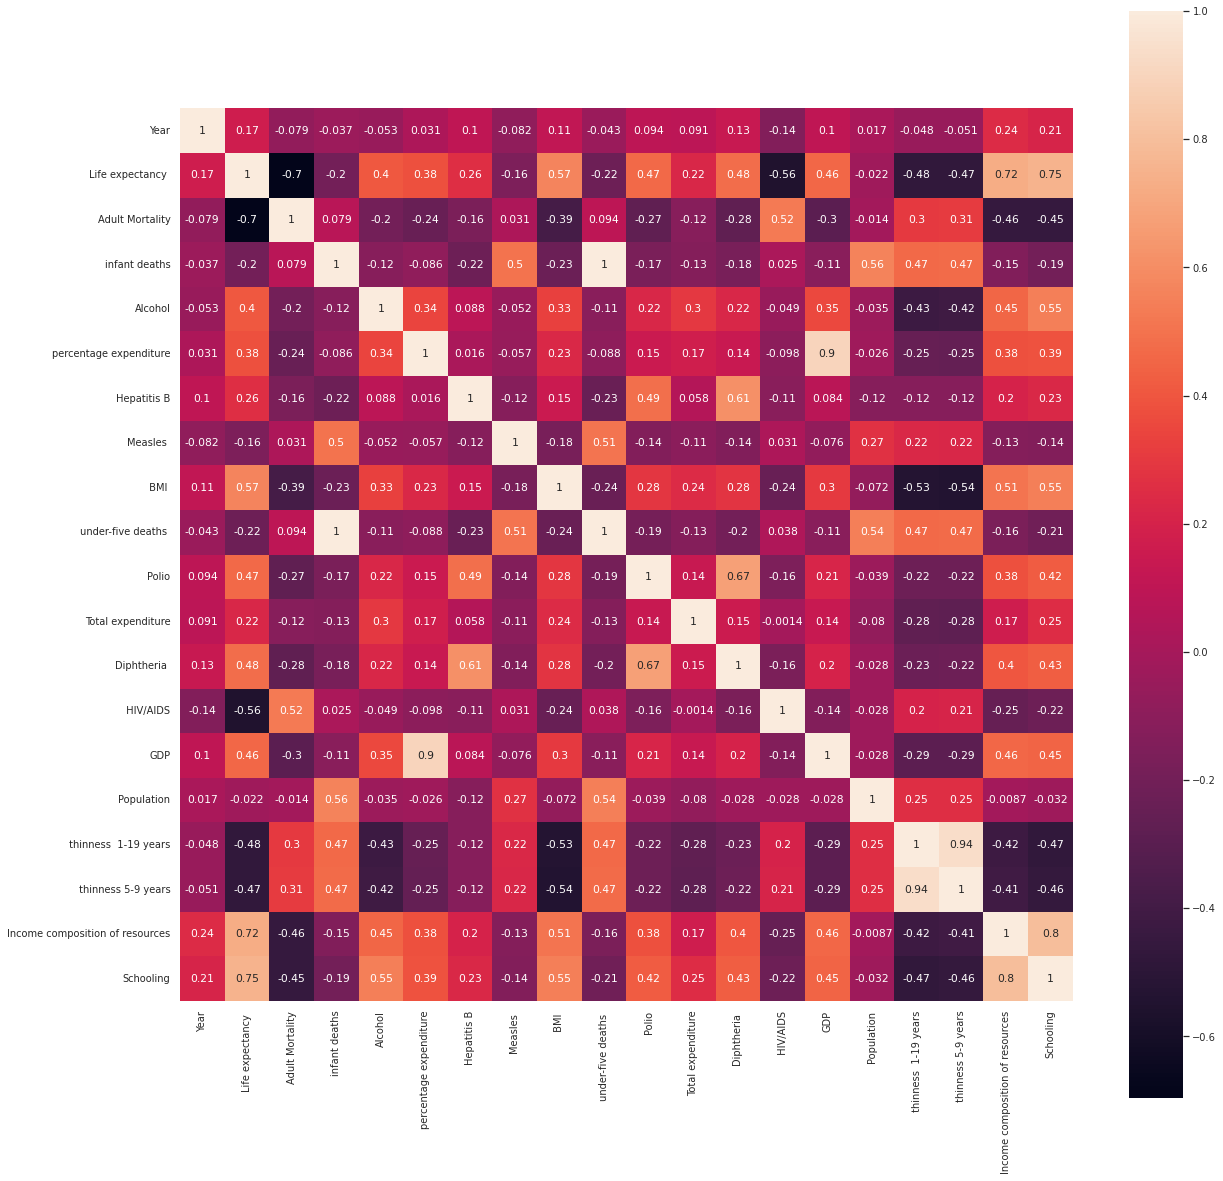

In [9]:
# Visualizing
sns.set(font_scale=0.9,rc = {'figure.figsize':(20,20)})

sns.heatmap(cm, cbar=True, annot=True, square=True)

In [10]:
pd.set_option('display.max_columns', None)

In [38]:
df_4.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0             62     0.01               71.279624         65.0      1154   
1             64     0.01               73.523582         62.0       492   
2             66     0.01               73.219243         64.0       430   
3             69     0.01               78.184215         67.0      2787   
4             71     0.01                7.097109         68.0      3013   

    BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
0   19.1                  83    6.0               8.16         65.0   
1   18.6                  86   58.0               8.18         62.0   
2   18.1                  89   62.0               8.13         64.0   
3   17.6                  93   67.0               8.52         67.0   
4   17.2                  97   68.0               7.87         68.0   

    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0        0.1  584.259210  33736494.0                   17.2   
1        0.1  612.696514    327582.0                   17.5   
2        0.1  631.744976  31731688.0                   17.7   
3        0.1  669.959000   3696958.0                   17.9   
4        0.1   63.537231   2978599.0                   18.2   

    thinness 5-9 years  Income composition of resources  Schooling  
0                 17.3                            0.479       10.1  
1                 17.5                            0.476       10.0  
2                 17.7                            0.470        9.9  
3                 18.0                            0.463        9.8  
4                 18.2                            0.454        9.5

In [54]:
# Selecting our features and value that we are trying to predict 
df_0 = df_0.iloc[:,[3,4,10,14,15,16,18,20,21]]# Life Expectancy,Adult Mortality,BMI,Income composition of resources, Schooling,HIV/AIDS,GDP,thinness 1-19 years,Diphteria 
df_1 = df_1.iloc[:,[3,5,6,8,11,14,15,16,19]]
df_2 = df_2.iloc[:,[0,3,6,7,9,10,13,16,17]]
df_3 = df_3.iloc[:,[0,1,2,3,4,10,15,20,21]]
df_4 = df_4.iloc[:,[1,3,5,8,9,13,15,16,17]]

In [13]:
df_0.head()

Life expectancy   Adult Mortality   BMI   Diphtheria    HIV/AIDS  \
0              65.0            263.0   19.1         65.0        0.1   
1              59.9            271.0   18.6         62.0        0.1   
2              59.9            268.0   18.1         64.0        0.1   
3              59.5            272.0   17.6         67.0        0.1   
4              59.2            275.0   17.2         68.0        0.1   

          GDP   thinness  1-19 years  Income composition of resources  \
0  584.259210                   17.2                            0.479   
1  612.696514                   17.5                            0.476   
2  631.744976                   17.7                            0.470   
3  669.959000                   17.9                            0.463   
4   63.537231                   18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5

In [14]:
df_1.head()

Life expectancy   infant deaths  Alcohol  Hepatitis B  under-five deaths   \
0              65.0             62     0.01         65.0                  83   
1              59.9             64     0.01         62.0                  86   
2              59.9             66     0.01         64.0                  89   
3              59.5             69     0.01         67.0                  93   
4              59.2             71     0.01         68.0                  97   

   Diphtheria    HIV/AIDS         GDP   thinness 5-9 years  
0         65.0        0.1  584.259210                 17.3  
1         62.0        0.1  612.696514                 17.5  
2         64.0        0.1  631.744976                 17.7  
3         67.0        0.1  669.959000                 18.0  
4         68.0        0.1   63.537231                 18.2

In [15]:
df_2.head()

Country  Life expectancy   Alcohol  percentage expenditure  Measles   \
0  Afghanistan              65.0     0.01               71.279624      1154   
1  Afghanistan              59.9     0.01               73.523582       492   
2  Afghanistan              59.9     0.01               73.219243       430   
3  Afghanistan              59.5     0.01               78.184215      2787   
4  Afghanistan              59.2     0.01                7.097109      3013   

    BMI   Total expenditure         GDP  Population  
0   19.1               8.16  584.259210  33736494.0  
1   18.6               8.18  612.696514    327582.0  
2   18.1               8.13  631.744976  31731688.0  
3   17.6               8.52  669.959000   3696958.0  
4   17.2               7.87   63.537231   2978599.0

In [16]:
df_3.head()

Country  Year      Status  Life expectancy   Adult Mortality   BMI   \
0  Afghanistan  2015  Developing              65.0            263.0   19.1   
1  Afghanistan  2014  Developing              59.9            271.0   18.6   
2  Afghanistan  2013  Developing              59.9            268.0   18.1   
3  Afghanistan  2012  Developing              59.5            272.0   17.6   
4  Afghanistan  2011  Developing              59.2            275.0   17.2   

    HIV/AIDS  Income composition of resources  Schooling  
0        0.1                            0.479       10.1  
1        0.1                            0.476       10.0  
2        0.1                            0.470        9.9  
3        0.1                            0.463        9.8  
4        0.1                            0.454        9.5

In [55]:
df_4.head()

Year  Life expectancy   infant deaths  Hepatitis B  Measles   \
0  2015              65.0             62         65.0      1154   
1  2014              59.9             64         62.0       492   
2  2013              59.9             66         64.0       430   
3  2012              59.5             69         67.0      2787   
4  2011              59.2             71         68.0      3013   

   Total expenditure   HIV/AIDS         GDP  Population  
0               8.16        0.1  584.259210  33736494.0  
1               8.18        0.1  612.696514    327582.0  
2               8.13        0.1  631.744976  31731688.0  
3               8.52        0.1  669.959000   3696958.0  
4               7.87        0.1   63.537231   2978599.0

In [56]:
# Splitting Data

x = df_0.iloc[:,[1,2,3,4,5,6,7,8]] # variables
y = df_0.iloc[:,[0]] # Life expectancy

x1 = df_1.iloc[:,[1,2,3,4,5,6,7,8]] # variables
y1 = df_1.iloc[:,[0]] # Life expectancy

x2 = df_2.iloc[:,[0,2,3,4,5,6,7,8]] # variables
y2 = df_2.iloc[:,[1]] # Life expectancy

x3 = df_3.iloc[:,[0,1,2,4,5,6,7,8]] # variables
y3 = df_3.iloc[:,[3]] # Life expectancy

x4 = df_4.iloc[:,[0,2,3,4,5,6,7,8]] # variables
y4 = df_4.iloc[:,[1]] # Life expectancy

In [58]:
y4

Life expectancy 
0                 65.0
1                 59.9
2                 59.9
3                 59.5
4                 59.2
...                ...
2933              44.3
2934              44.5
2935              44.8
2936              45.3
2937              46.0

[1659 rows x 1 columns]

In [19]:
y2

Life expectancy 
0                 65.0
1                 59.9
2                 59.9
3                 59.5
4                 59.2
...                ...
2933              44.3
2934              44.5
2935              44.8
2936              45.3
2937              46.0

[2101 rows x 1 columns]

In [59]:
### Getting dummies for our data at df_2 and df_3 and df_4 (Tokenizing our features that include String to fit into Lineer Regression)
x2 = pd.get_dummies(data=x2)
x3 = pd.get_dummies(data=x3)

In [60]:
# Splitting data part2
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=147)
x1_train, x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3, random_state=147)
x2_train, x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.3, random_state=147)
x3_train, x3_test,y3_train,y3_test=train_test_split(x3,y3,test_size=0.3, random_state=147)
x4_train, x4_test,y4_train,y4_test=train_test_split(x4,y4,test_size=0.3, random_state=147)

In [62]:
x4_train

Year  infant deaths  Hepatitis B  Measles   Total expenditure  \
503   2008              2         28.0        62               1.30   
1964  2010              1         94.0         0               8.50   
1347  2014              5         95.0       321               4.36   
1140  2013              4         97.0         0               9.15   
197   2010            126         94.0       788               3.60   
...    ...            ...          ...       ...                ...   
2369  2007              0          9.0         0               6.42   
30    2001              1         96.0        18               6.00   
826   2007              2         99.0         0               6.32   
425   2006             24         92.0       784              11.49   
1288  2009              2         96.0       351               9.41   

       HIV/AIDS           GDP  Population  
503         0.1  46596.335990  33245773.0  
1964        0.1   7937.259931   3643222.0  
1347        0.1   1286.565110  17289224.0  
1140        0.4   2136.773950   8657785.0  
197         0.1    757.671757  15214912.0  
...         ...           ...         ...  
2369        0.1    146.931125     49294.0  
30          0.1   1326.973390     36173.0  
826         0.3    334.838170    683475.0  
425         3.8    165.879418   7675338.0  
1288        0.1  36976.845120   5995365.0  

[1161 rows x 8 columns]

In [23]:
y_train

Life expectancy 
456               72.3
1811              57.4
1235              67.9
176               76.9
1889              52.1
...                ...
927               78.1
2931              45.4
2427              82.4
295               67.0
860               59.4

[1715 rows x 1 columns]

In [63]:
# Scaling our features to -1 to 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_xtrain=scaler.fit_transform(x_train)

In [25]:
scaler_1 = MinMaxScaler(feature_range=(0,1))
scaled_x1train=scaler_1.fit_transform(x1_train)

In [26]:
scaler_2 = MinMaxScaler(feature_range=(0,1))
scaled_x2train=scaler_2.fit_transform(x2_train)

In [27]:
scaler_3 = MinMaxScaler(feature_range=(0,1))
scaled_x3train=scaler_3.fit_transform(x3_train)

In [64]:
scaler_4 = MinMaxScaler(feature_range=(0,1))
scaled_x4train=scaler_4.fit_transform(x4_train)

In [28]:
scaled_xtrain

array([[0.17458101, 0.31627297, 0.98969072, ..., 0.28985507, 0.63703704,
        0.5804878 ],
       [0.05586592, 0.30314961, 0.79381443, ..., 0.56521739, 0.59153439,
        0.56097561],
       [0.27653631, 0.74934383, 0.63917526, ..., 0.1884058 , 0.6962963 ,
        0.49268293],
       ...,
       [0.00698324, 0.83989501, 0.96907216, ..., 0.01811594, 0.92486772,
        0.85365854],
       [0.32541899, 0.22834646, 0.96907216, ..., 0.61594203, 0.        ,
        0.51219512],
       [0.04608939, 0.16404199, 0.96907216, ..., 0.33695652, 0.        ,
        0.26341463]])

In [65]:
# Creating our model
model = LinearRegression()
model_1 = LinearRegression()
model_2 = LinearRegression()
model_3 = LinearRegression()
model_4 = LinearRegression()

In [66]:
model.fit(scaled_xtrain,y_train)
model_1.fit(scaled_x1train,y1_train)
model_2.fit(scaled_x2train,y2_train)
model_3.fit(scaled_x3train,y3_train)
model_4.fit(scaled_x4train,y4_train)

LinearRegression()

In [31]:
# Scaling our test values to 0-1 scale NOT FITTING
scaled_Xtest=scaler.transform(x_test)
y_predict=model.predict(scaled_Xtest)

In [32]:
#Running our model and predicting
scaled_X1test=scaler_1.transform(x1_test)
y1_predict=model_1.predict(scaled_X1test)

In [33]:
scaled_X2test=scaler_2.transform(x2_test)
y2_predict=model_2.predict(scaled_X2test)

In [34]:
scaled_X3test=scaler_3.transform(x3_test)
y3_predict=model_3.predict(scaled_X3test)

In [67]:
scaled_X4test=scaler_4.transform(x4_test)
y4_predict=model_4.predict(scaled_X4test)

In [68]:
# Evaluating
print("Model_0 3 scores below")
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))
print(r2_score(y_test,y_predict))
print()
print('Model_1 3 scores below')
print(mean_absolute_error(y1_test,y1_predict))
print(mean_squared_error(y1_test,y1_predict))
print(r2_score(y1_test,y1_predict))
print()
print('Model_2 3 scores below')
print(mean_absolute_error(y2_test,y2_predict))
print(mean_squared_error(y2_test,y2_predict))
print(r2_score(y2_test,y2_predict))
print()
print('Model_3 3 scores below')
print(mean_absolute_error(y3_test,y3_predict))
print(mean_squared_error(y3_test,y3_predict))
print(r2_score(y3_test,y3_predict))
print()
print('Model_4 3 scores below')
print(mean_absolute_error(y4_test,y4_predict))
print(mean_squared_error(y4_test,y4_predict))
print(r2_score(y4_test,y4_predict))

Model_0 3 scores below
2.9906658831984165
16.31082140360758
0.8225751887180066

Model_1 3 scores below
4.014039936458332
26.018867456574156
0.6450320022632019

Model_2 3 scores below
2.0879373638074483
8.850195342727394
0.9135711018723932

Model_3 3 scores below
1.232974982871498
4.334224102703285
0.9507210847973144

Model_4 3 scores below
4.684889697875303
38.88131774963657
0.508112266631854
